In [35]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [36]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import pandas as pd
import numpy as np
import sys
if not hasattr(sys, "version_info") or sys.version_info < (3, 5):
  raise SystemExit("This program requires Python 3.5 or later.")
import matplotlib
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [30/2.54, 20/2.54]
## https://github.com/ipython/ipyparallel
import ipyparallel as ipp
workers = ipp.Client()[:]

In [53]:
def getsize(initial, n: int) -> dict:
    a = initial[0]
    b = initial[1]
    def hasPair(a: int, b: int, l: list)->bool:
        sz = len(l)
        if sz < 2:
            return False
        for i in range(sz - 1):
            if (l[i] == a) and (l[i+1] == b):
                return True
        return False
    
    max = (10 ** n) - 1
    rc = {}
    rc["seq"] = [a, b]  
    rc["sz"] = 0
    ## trivial
    if (a == 0 and b == 0) or (a == 0  and b == max) or (a == max  and b == 0):
        return rc

    done = False
    sz = 0
    
    while not done:
        c = a + b
        if c >= max:
            c = c - max
        done = hasPair(b, c, rc["seq"] )
        rc["seq"] .append(c)
        sz += 1
        a = b
        b = c
    rc["sz"] = sz
    return rc
    

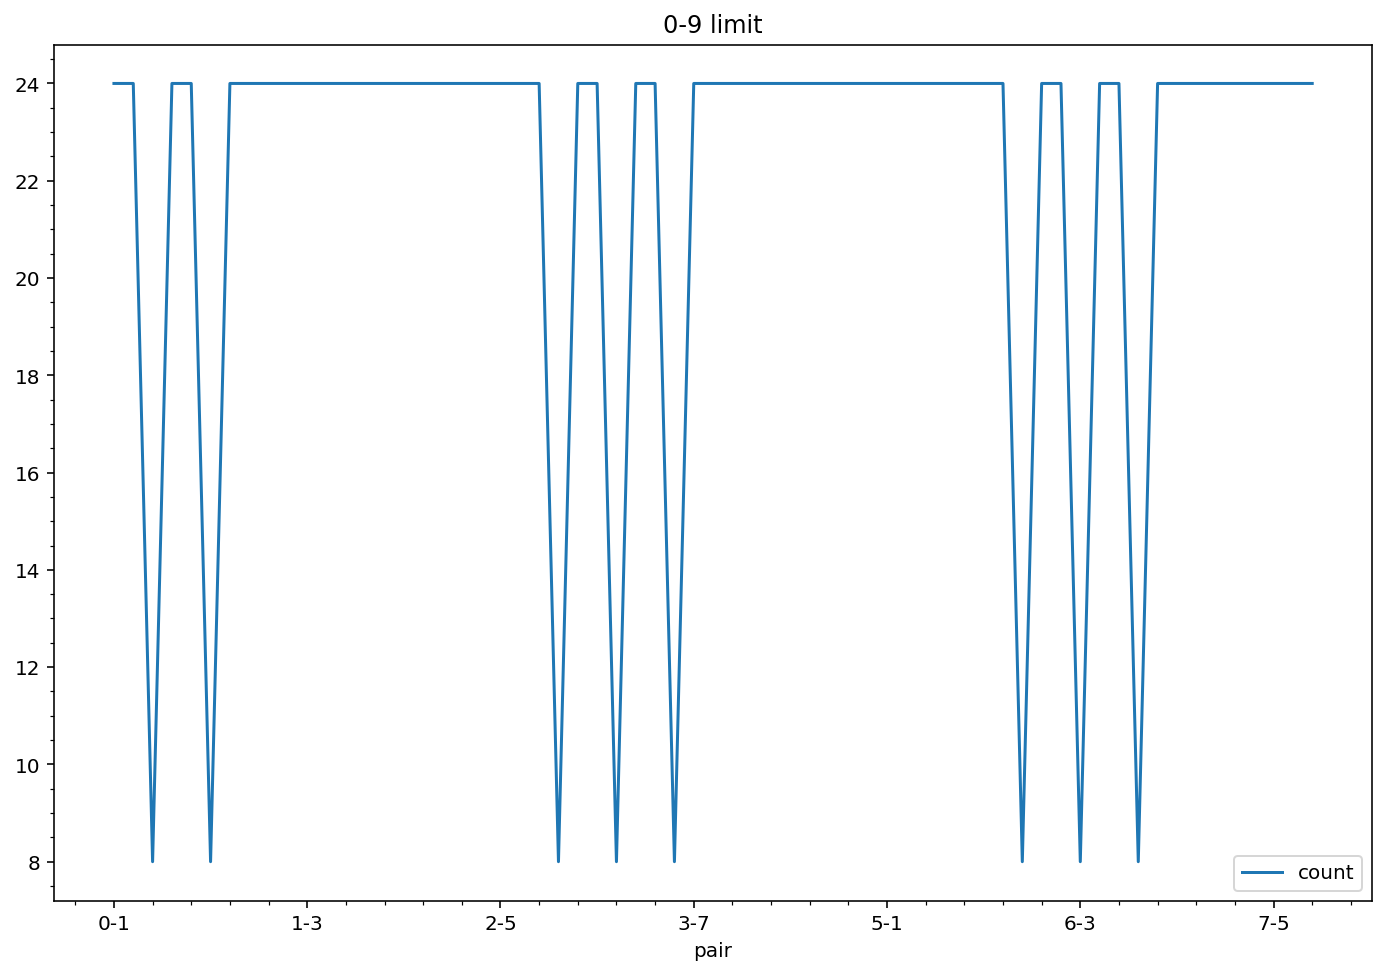

CPU times: user 352 ms, sys: 28.1 ms, total: 380 ms
Wall time: 397 ms


[24, 8]

In [54]:
%%time
s_list = []
variants = []
n = 1
max = (10 ** n) - 1
for x, y in np.ndindex((max-1,max-1)):
    s = getsize((x, y), 1)["sz"]
    if s > 0:
        s_list.append([("%d-%d" % (x, y)), s])
        variants.append(s)
variants = list(set(variants))
df1 = pd.DataFrame(s_list)
df1.columns = ["pair", "count"]
df1.plot.line(x="pair", y="count")
plt.title("0-9 limit")
#plt.grid(b=True, which='minor', color='#2c3e50')
plt.minorticks_on()
plt.show()
variants

In [77]:
def makedata(n: int)->list:
    s_list = []
    variants = []
    max = (10 ** n) - 1
    inData = []
    for x, y in np.ndindex((max-1,max-1)):
        inData.append((x, y))
    parts = workers.map_async(getsize, inData, [n]*len(inData)).get()

    for d in parts:
        s = d["sz"]
        if d["sz"] > 0:
            s_list.append([("%d-%d" % (d["seq"][0], d["seq"][1])), d["sz"]])

            variants.append(d["sz"])

    variants = list(set(variants))
    df1 = pd.DataFrame(s_list)
    df1.columns = ["pair", "count"]
    df1.plot.line(x="pair", y="count")
    plt.title("0-%d limit" % max)
    #plt.grid(b=True, which='minor', color='#2c3e50')
    plt.minorticks_on()
    plt.show()
    return variants.sort() 

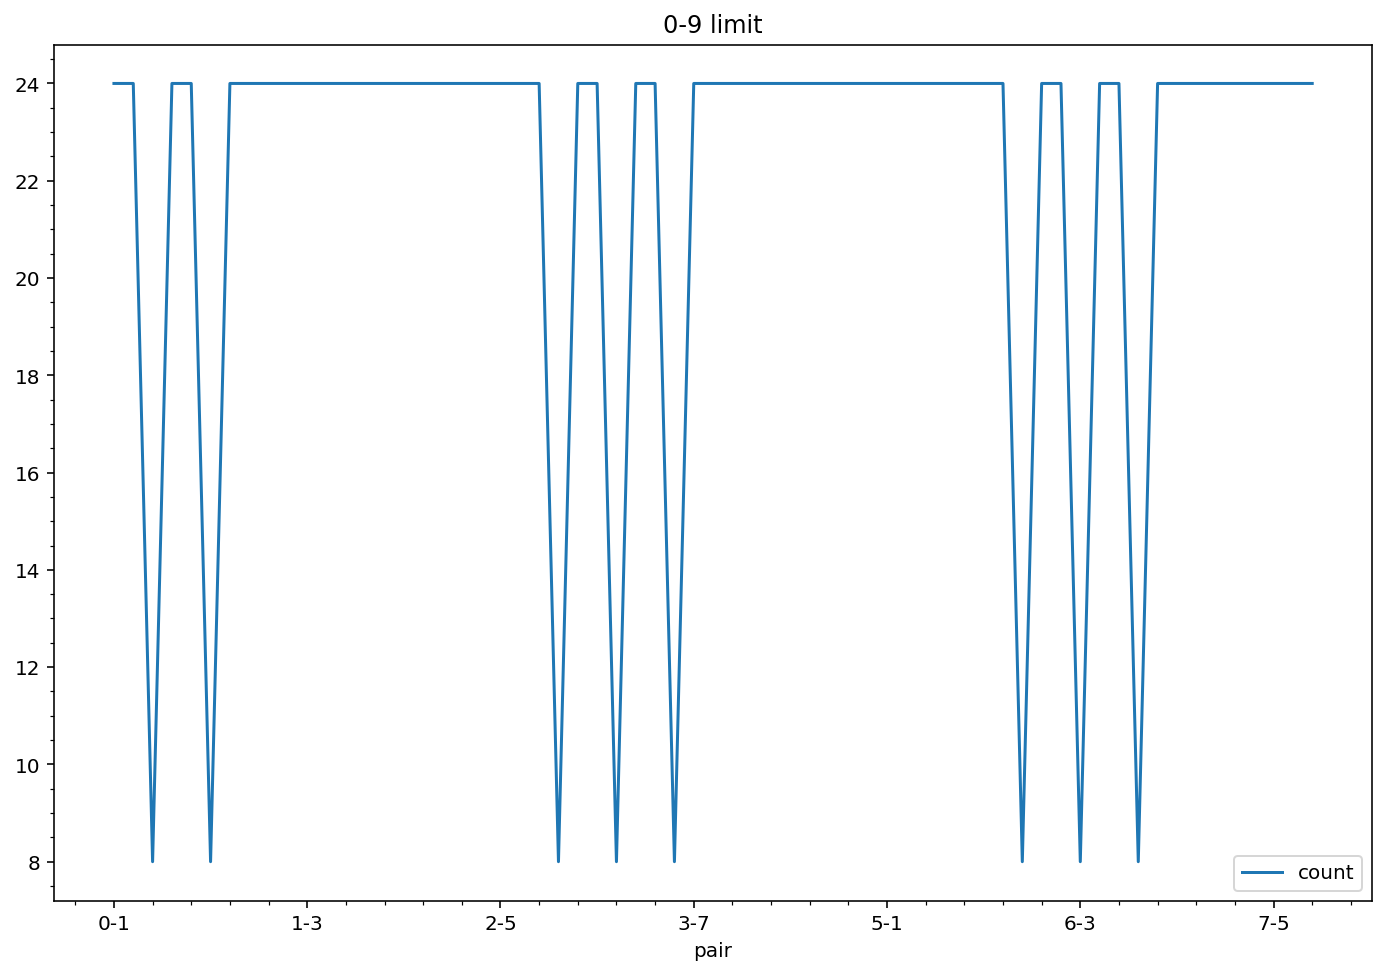

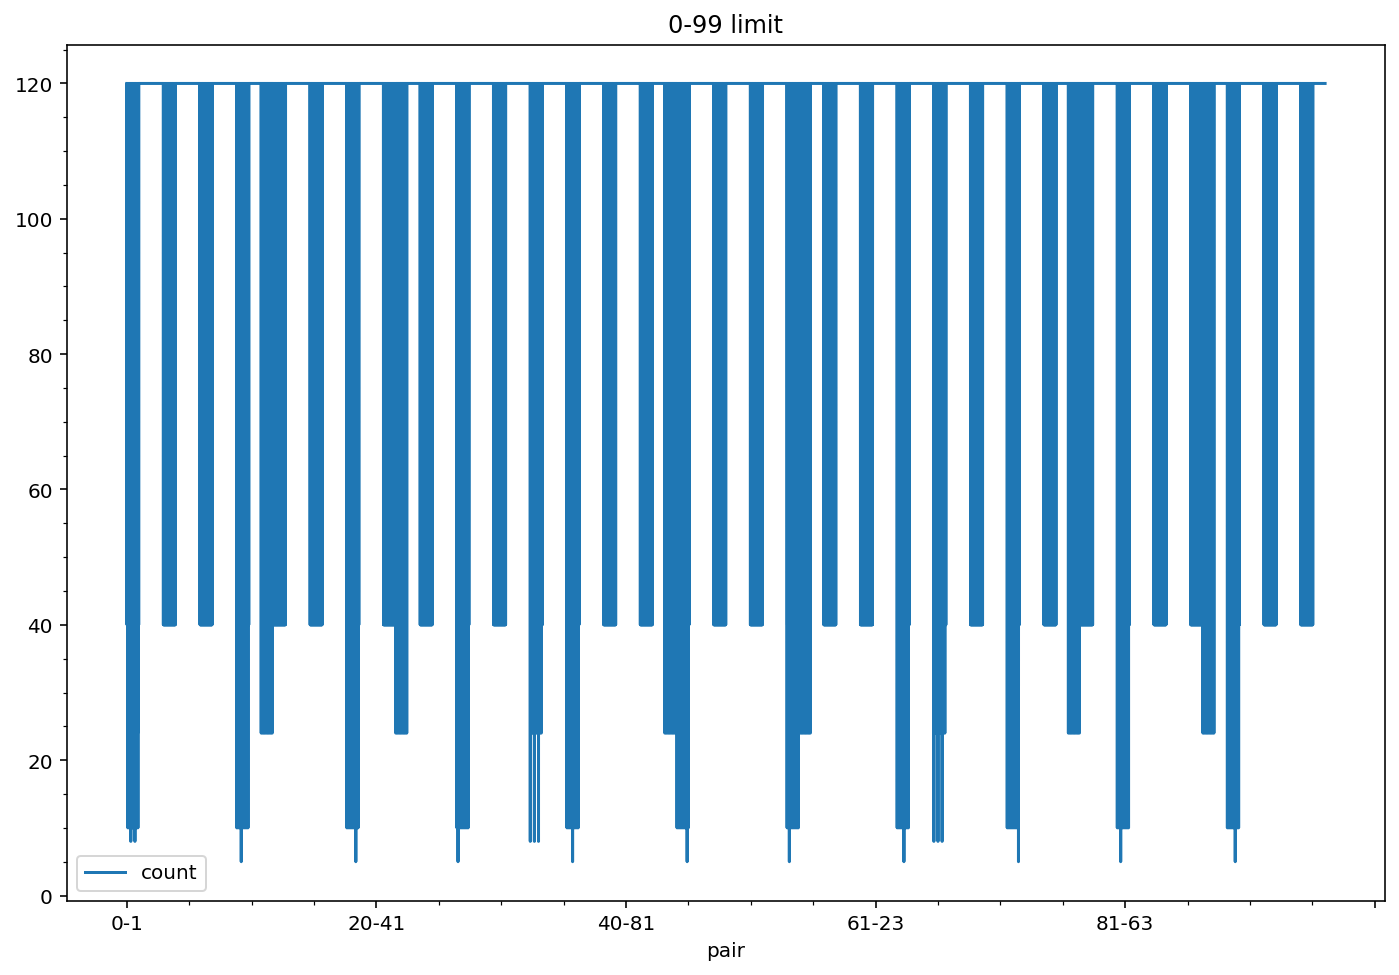

{'1': None, '2': None}

In [78]:
results = {}
for n in range(1, 3):
    results[str(n)] = makedata(n)
results     

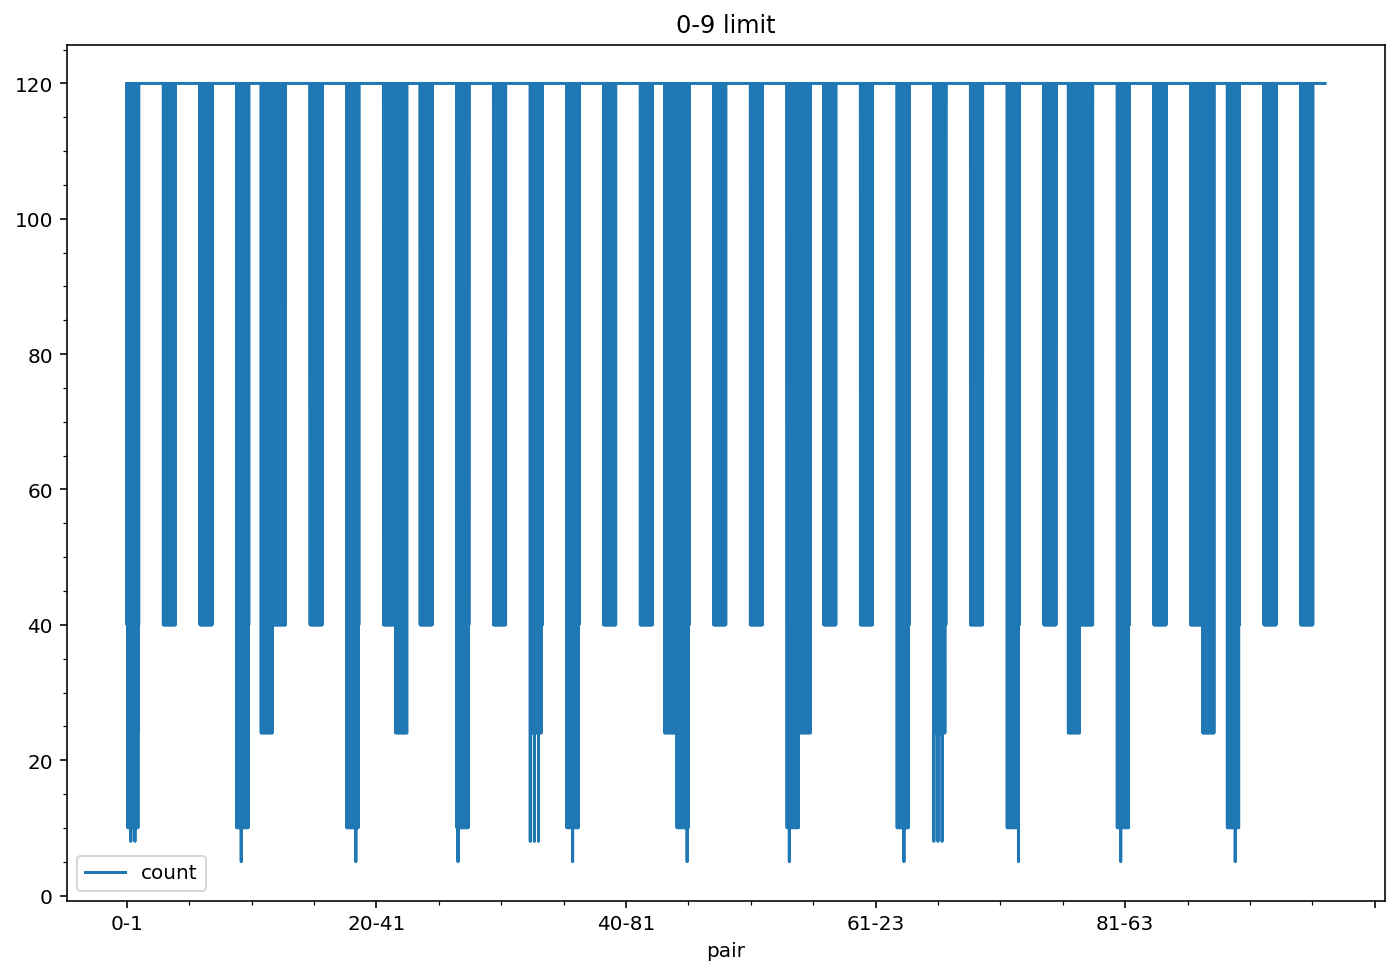

CPU times: user 1.2 s, sys: 0 ns, total: 1.2 s
Wall time: 2.11 s


[5, 40, 8, 10, 120, 24]

In [66]:
%%time
s_list = []
variants = []
n = 2
max = (10 ** n) - 1
inData = []
for x, y in np.ndindex((max-1,max-1)):
    inData.append((x, y))
parts = workers.map_async(getsize, inData, [n]*len(inData)).get()


for d in parts:
    s = d["sz"]
    if d["sz"] > 0:
        s_list.append([("%d-%d" % (d["seq"][0], d["seq"][1])), d["sz"]])
        
        variants.append(d["sz"])
        
variants = list(set(variants))
df1 = pd.DataFrame(s_list)
df1.columns = ["pair", "count"]
df1.plot.line(x="pair", y="count")
plt.title("0-9 limit")
#plt.grid(b=True, which='minor', color='#2c3e50')
plt.minorticks_on()
plt.show()
variants


In [44]:
%%time
s_list = []
for x, y in np.ndindex((998,998)):
    s = getsize(x, y, 3)["sz"]
    if s > 0:
        s_list.append([("%d-%d" % (x, y)), s])
    
df1 = pd.DataFrame(s_list)
df1.columns = ["pair", "count"]
df1.plot.line(x="pair", y="count")
plt.title("0-9 limit")
plt.minorticks_on()
plt.show()
s_list

KeyboardInterrupt: 